## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import random
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice.
total_unique_mice = len(merged_mouse_df["Mouse ID"].unique())
print(total_unique_mice)

count = merged_mouse_df["Mouse ID"].count()
count

249


1893

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Select all duplicate rows based on multiple column names in list
duplicate_mice = merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice1 = merged_mouse_df[merged_mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep = 'last')]
duplicate_mice1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merged_mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint']).reset_index(drop=True)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Check the number of mice in the clean DataFrame.
count_cleaned = clean_mouse_df["Mouse ID"].count()
count_cleaned

1888

## Summary Statistics

In [22]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = round(clean_mouse_df['Tumor Volume (mm3)'].mean(),4)
tumor_vol_median = round(clean_mouse_df['Tumor Volume (mm3)'].median(),4)
tumor_vol_std = round(clean_mouse_df['Tumor Volume (mm3)'].std(),4)
tumor_vol_sem = round(sem(clean_mouse_df['Tumor Volume (mm3)']),4)

print(tumor_vol_mean)
print(tumor_vol_median)
print(tumor_vol_std)
print(tumor_vol_sem)

summary_df = pd.DataFrame({"Tumor Volume (mm3) mean": [tumor_vol_mean],
                              "Tumor Volume (mm3) median": tumor_vol_median,
                              "Tumor Volume std": tumor_vol_std,
                              "Tumor Volume SEM": tumor_vol_sem})

summary_df


50.4493
48.9514
8.9046
0.2049


,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume std,Tumor Volume SEM
0,50.4493,48.9514,8.9046,0.2049


In [ ]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

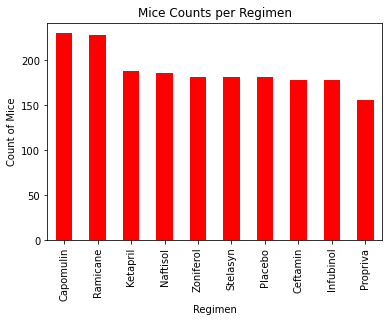

<Figure size 432x288 with 0 Axes>

In [13]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
regimen_cnt = clean_mouse_df["Drug Regimen"].value_counts()
regimen_cnt.plot(kind="bar", facecolor="red")

# Set textual properties
plt.title("Mice Counts per Regimen")
plt.ylabel("Count of Mice")
plt.xlabel("Regimen")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()

In [14]:
reg_list = pd.DataFrame(regimen_cnt)
new_ind_reg_list = reg_list.reset_index(drop=False)
new_ind_reg_list = new_ind_reg_list.rename(
    columns={"Drug Regimen": "Mice Count", "index": "Drug Regimen"})
new_ind_reg_list

,Drug Regimen,Mice Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,156


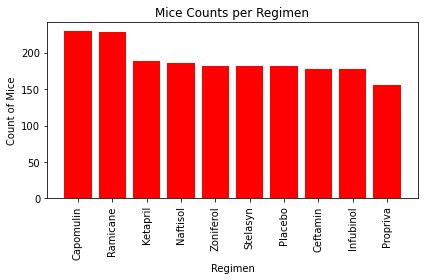

In [19]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

# Set x axis and tick locations
x_axis = np.arange(len(new_ind_reg_list))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, new_ind_reg_list["Mice Count"], facecolor="red", alpha=1.0, align="center")
plt.xticks(tick_locations, new_ind_reg_list["Drug Regimen"], rotation="vertical")

# Set textual properties
plt.title("Mice Counts per Regimen")
plt.ylabel("Count of Mice")
plt.xlabel("Regimen")

plt.tight_layout()

plt.show()

In [71]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
filtered_df = clean_mouse_df[["Sex", "Mouse ID"]]
filtered_df.head()

grouped_by_gender = filtered_df.groupby(["Sex"])
grouped_gender_df = grouped_by_gender["Mouse ID"].count()

gender_cnts_df = pd.DataFrame({"Count": grouped_gender_df})

# place gender keys for the percents
gender_list = gender_cnts_df.keys()

'Count'

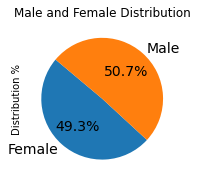

In [72]:
ax1 = plt.subplot(121, aspect='equal')
sex_pie = gender_cnts_df.plot(kind="pie", y=gender_list[0], ax=ax1, autopct='%1.1f%%', 
 startangle=140, shadow=False, legend = False, fontsize=14, title=("Male and Female Distribution"))
sex_pie.set_ylabel("Distribution %")

plt.show()

In [75]:
# The index can be reset to provide index numbers based on the new rankings.
new_index_df = gender_cnts_df.reset_index(drop=False)

,Sex,Count
0,Female,930
1,Male,958


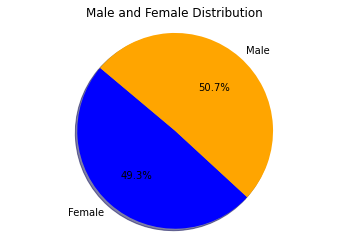

In [77]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(new_index_df["Count"], labels=new_index_df["Sex"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


# Tells matplotlib that we want a pie chart with equal axes (if starts to look like an oval)
plt.title('Male and Female Distribution')
plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
